## Snapshot2D

Opening many Niftis is time consuming. Making Snapshots (jpg) and storing them in a single folder enables us to look at the dataset in a much more efficient way.

We recommend generating two files, one in derivatives or rawdata and in one separate folder where all snapshots are. (create_snapshot([out_file,other_out_file],mr_frame))

In [1]:
from BIDS.snapshot2D import create_snapshot,Snapshot_Frame,Visualization_Type,Image_Modes
from pathlib import Path
from IPython.display import Image

In [2]:
#Lets load images and segmentations
root = "/media/data/robert/datasets/2022_06_21_T1_CT_wopathfx/dataset_org/"
ct_file = Path(root,"rawdata/fxclass0001/20190404_0135449541/sub-fxclass0001_dir-iso_sequ-WSKFfurMPRiDose4201_ct.nii.gz")
mr_file = Path(root,"rawdata/fxclass0001/20190510_0135609116/sub-fxclass0001_dir-sag_sequ-T1WTSE301_T1.nii.gz")
mr_ctd_file = Path(root,"derivatives/fxclass0001/20190510_0135609116/sub-fxclass0001_dir-sag_sequ-T1WTSE301_seg-subreg_ctd.json")
subreg_file = Path(root,"derivatives/fxclass0001/20190404_0135449541/sub-fxclass0001_dir-iso_sequ-WSKFfurMPRiDose4201_seg-subreg_msk.nii.gz")
vert_file = Path(root,"derivatives/fxclass0001/20190404_0135449541/sub-fxclass0001_dir-iso_sequ-WSKFfurMPRiDose4201_seg-vert_msk.nii.gz")
ctd_file = Path(root,"derivatives/fxclass0001/20190404_0135449541/sub-fxclass0001_dir-iso_sequ-WSKFfurMPRiDose4201_seg-subreg_ctd.json")
out_file = Path('/tmp/out.jpg')
ctd_proc_file = Path('/tmp/ctd.json')


## Making Snapshots

Use Snapshot_Frame() and create_snapshot() to make snapshots.
Snapshot_Frame() has a bunch of important options:

mode: changes how the images are clamped
possibilities:

MINMAX [MIN,MAX] default

MRI    [0,99%]

CT     [-200,1000]

CTs    [-500,1300] no_clip



[*] Snapshot saved: /tmp/out.jpg


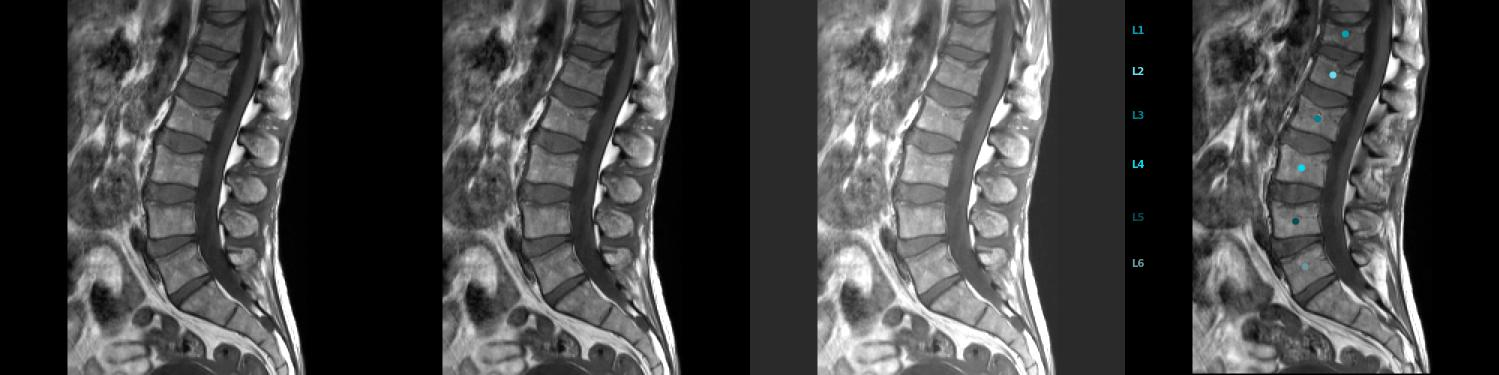

In [3]:

mr_frame = [Snapshot_Frame(mr_file,mode='MRI'),Snapshot_Frame(mr_file,mode='MINMAX'),Snapshot_Frame(mr_file,mode='CT')] #without centroids
if mr_ctd_file.exists():
    #with centroids
    mr_frame.append(Snapshot_Frame(mr_file,centroids=mr_ctd_file,mode='MRI'))
create_snapshot(out_file,mr_frame)
Image(filename=out_file) 

### Showing CT with segmentation and centroids

sagittal, coronal, axial (bool) sets which views are used for the snapshot
give the snapshot a segmentation and centroids by setting the corresponding arguments

[*] Snapshot saved: /tmp/out.jpg


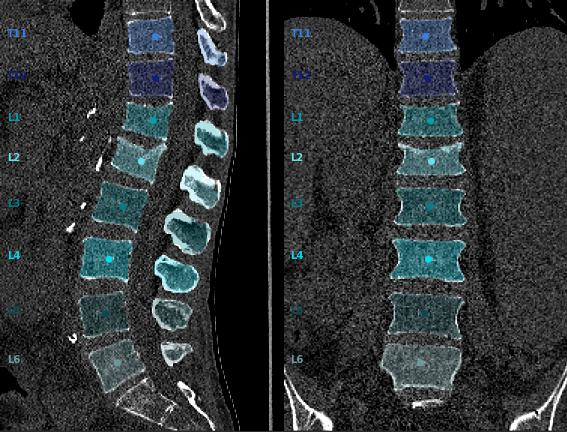

In [5]:
ct_frame = Snapshot_Frame(ct_file,segmentation=vert_file,centroids=ctd_file,sagittal=True,coronal=True,mode='CT')
create_snapshot(out_file,[ct_frame])
Image(filename=out_file) 

### Making a MIP (Maximum intensity projections)

You can change the visualization type to "Maximum_Intensity", which takes the maximum value along the corresponding axes for the snapshot

[*] Snapshot saved: /tmp/out.jpg


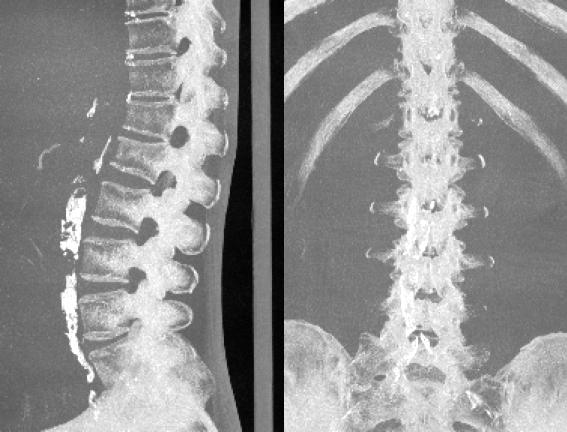

In [6]:
mip_frame = Snapshot_Frame(ct_file,sagittal=True,coronal=True,visualization_type=Visualization_Type.Maximum_Intensity)
create_snapshot(out_file,[mip_frame])
Image(filename=out_file) 

### Show multiple images

To show multiple snapshots of different modalities side by side, just give the create_snapshot function a list of different Snapshot_Frames

[*] Snapshot saved: /tmp/out.jpg


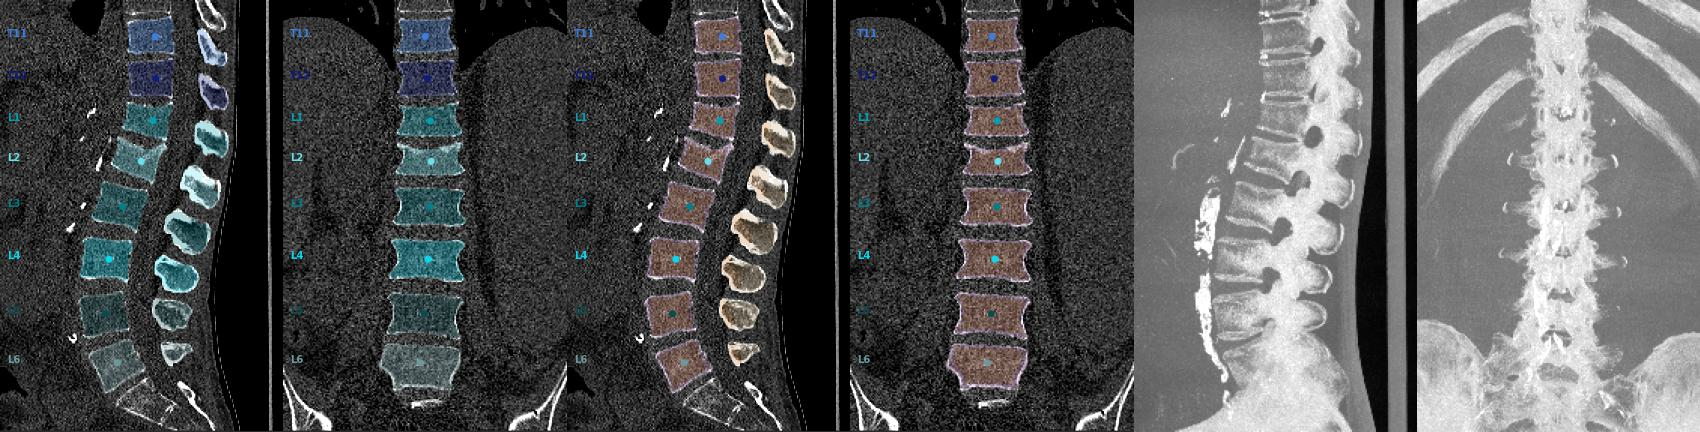

In [7]:
ct_frame_subreg = Snapshot_Frame(ct_file,segmentation=subreg_file,centroids=ctd_file,sagittal=True,coronal=True,mode='CT')
create_snapshot(out_file,[ct_frame,ct_frame_subreg,mip_frame])
Image(filename=out_file) 

### Show only the mask

you can set "only_mask_area=True" to only snapshot the parts that are part of the vertebra mask segmentation.

[*] Snapshot saved: /tmp/out.jpg


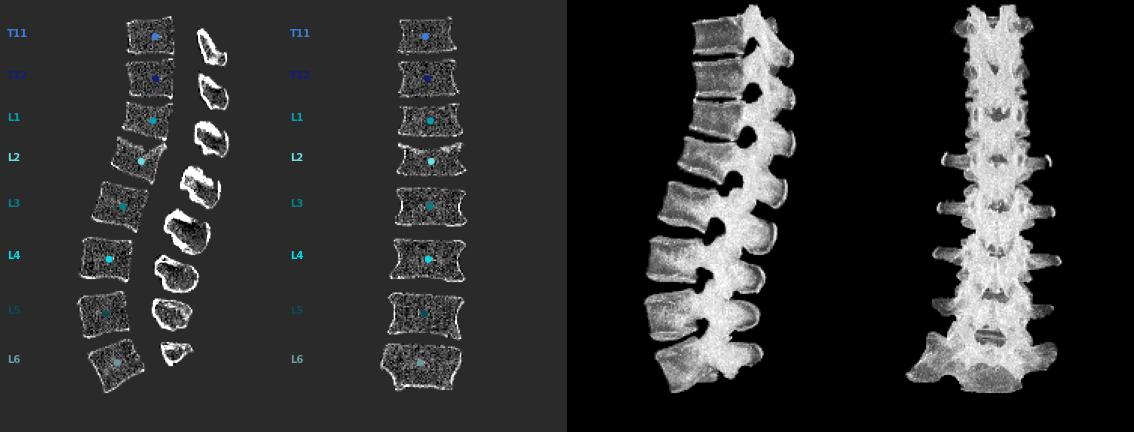

In [8]:
ct_frame = Snapshot_Frame(ct_file,segmentation=vert_file,centroids=ctd_file,sagittal=True,coronal=True,visualization_type=Visualization_Type.Slice,mode='CT',only_mask_area=True,hide_segmentation=True)
mip_frame = Snapshot_Frame(ct_file,segmentation=vert_file,centroids=ctd_file,sagittal=True,coronal=True,visualization_type=Visualization_Type.Maximum_Intensity,only_mask_area=True,hide_segmentation=True,hide_centroids=True)
create_snapshot(out_file,[ct_frame,mip_frame])
Image(filename=out_file) 

# Computing Centroids
We recommend always compute centroids, store them and reload them if they already exit. This will speed up the centroid generation.

calc_centroids_labeled_buffered will load the Centroid file if present; 

else it will compute and save the Centroid file

Note: If you provide only BIDS_File the "calc_centroids_labeled_buffered" methods can compute an automatic path


In [9]:
from BIDS import calc_centroids_labeled_buffered,Location
import time
if ctd_proc_file.exists():
    ctd_proc_file.unlink()
t_s = time.time()
cdt_proc = calc_centroids_labeled_buffered(vert_file,subreg_file,out_path=ctd_proc_file,subreg_id=Location.Spinosus_Process)
print(cdt_proc)
print(f"It took {time.time()-t_s:.1f} seconds to compute the centroids")
t_s = time.time()
cdt_proc = calc_centroids_labeled_buffered(vert_file,subreg_file,out_path=ctd_proc_file,subreg_id=Location.Spinosus_Process)
print(f"It took {time.time()-t_s:.5f} seconds to load the centroids")

[*] Generate ctd json towards /tmp/ctd.json
[*] Calc centroids from subregion id Location.Spinosus_Process (512, 512, 719)
[*] Centroids saved: /tmp/ctd.json
Centroids(orientation=('L', 'A', 'S'), centroids={18: (259.881, 129.783, 629.709), 19: (260.064, 123.921, 558.24), 20: (262.25, 121.245, 482.135), 21: (261.634, 137.997, 401.937), 22: (262.649, 161.562, 324.926), 23: (259.779, 182.065, 255.792), 24: (255.324, 192.157, 194.657), 25: (255.214, 183.955, 129.841)}, location=<Location.Unknown: 0>, zoom=(0.369140625, 0.369140625, 0.4000000059604645))
It took 15.1 seconds to compute the centroids
[*] Load ctd json from /tmp/ctd.json
It took 0.00032 seconds to load the centroids


[*] Snapshot saved: /tmp/out.jpg


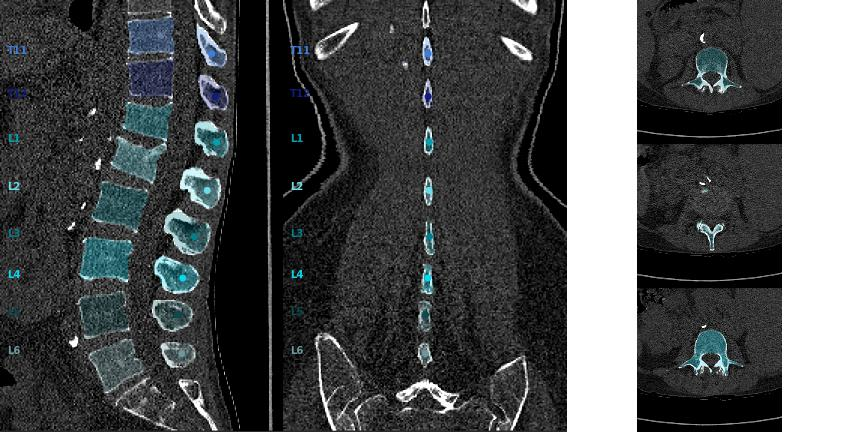

In [10]:
frame = Snapshot_Frame(ct_file,segmentation=vert_file,centroids=cdt_proc,sagittal=True,coronal=True,axial=True,mode='CT')
create_snapshot(out_file,[frame])
Image(filename=out_file) 

In [11]:
out_file.unlink()
ctd_proc_file.unlink()